In [59]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

df = pd.read_csv('static/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Identifying What Data we have in our dataset

We want to figure out what data we have in our dataset. We can do this by using the `info()` method.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


For our numerical data we can quickly get some rough information about all the different columns by using the `describe()` method.

In [61]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [75]:
print(df['company_location'].unique())

['DE' 'US' 'PT' 'GB' 'IN' 'IQ' 'IT' 'DZ' 'CZ' 'FR' 'ES' 'UA' 'CN' 'LU'
 'DK' 'AU' 'PK' 'NL' 'CO' 'KE' 'JP' 'CH' 'CA' 'VN' 'MY' 'NG' 'AS' 'PL'
 'TR' 'GR' 'BE' 'EE' 'AT' 'AE' 'IL' 'SG' 'SI' 'RO' 'IR' 'HU' 'MX' 'CL'
 'MT' 'MD' 'BR' 'HN' 'HR' 'NZ' 'IE' 'RU']


We can also plot this data as well, we can use a box and whisker plot to visualize this data.

Text(0.5, 1.0, 'Average Salary in USD')

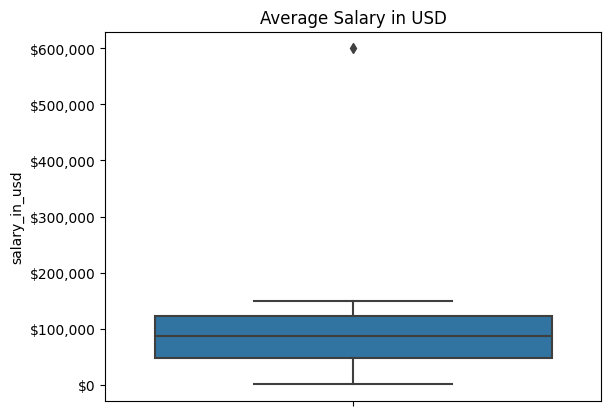

In [62]:
tmp = df.describe()
plot = sns.boxplot(data=tmp, y='salary_in_usd')
plot.yaxis.set_major_formatter('${x:,.0f}')
#label the points on the box plot
plot.set_title('Average Salary in USD')

We see we have one outlier way out at 600k, we can remove this and plot the data again to get a slightly nicer visualization of that salary data

Text(0.5, 1.0, 'Average Salary in USD without max')

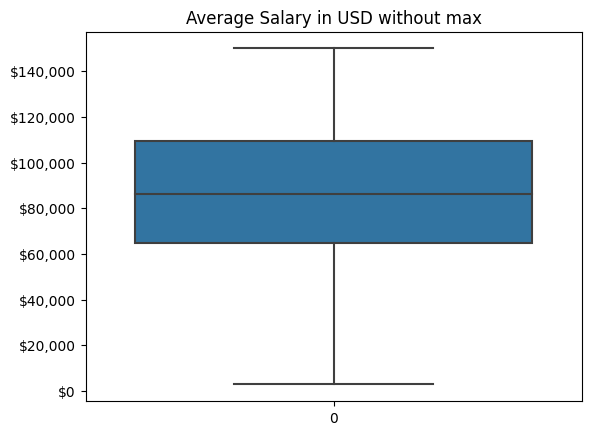

In [63]:
tmp = df.describe()
tmp.drop('count', axis=0, inplace=True)
tmp.drop('max', axis=0, inplace=True)
plot = sns.boxplot(data=tmp['salary_in_usd'])
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary in USD without max')

Alone this data isn't that interesting.  We have data that was collected year by year, so We can first group the data by year, and try to see if there was any trend over time

Text(0.5, 1.0, 'Average Salary in USD by Work Year')

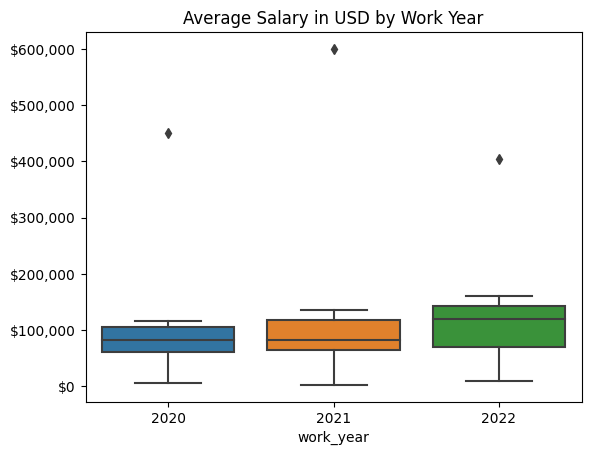

In [64]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').describe()
tmp = tmp['salary_in_usd']
tmp.drop('count', axis=1, inplace=True)
tmp = tmp.transpose()
plot = sns.boxplot(data=tmp)
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary in USD by Work Year')

Our graphs are heavily skewed by the max outliers, so let's remove those and plot again

Text(0.5, 1.0, 'Average Salary in USD by Work Year without max')

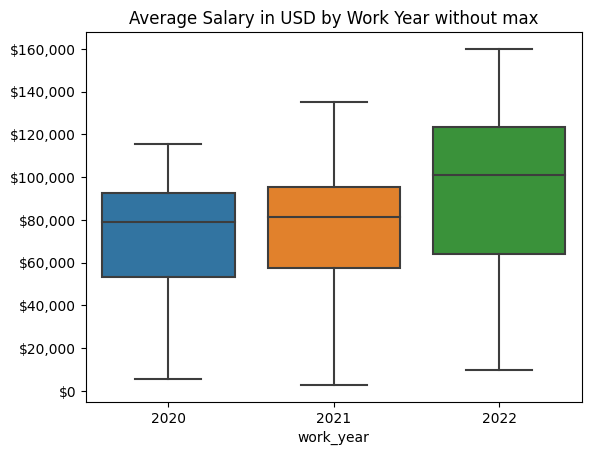

In [65]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').describe()
tmp = tmp['salary_in_usd'] # this line is necessary because it created a multi-index in the last step
tmp.drop('count', axis=1, inplace=True)
tmp.drop('max', axis=1, inplace=True)
tmp = tmp.transpose()
plot = sns.boxplot(data=tmp)
plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary in USD by Work Year without max')

Text(0.5, 1.0, 'Average Salary in USD by Work Year without max')

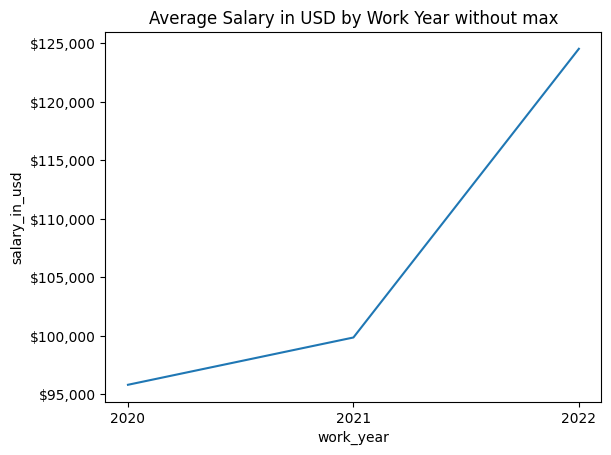

In [162]:
tmp = df[['salary_in_usd', 'work_year']]
tmp = tmp.groupby('work_year').mean().reset_index()
tmp['work_year'] = tmp['work_year'].astype(str)
plot = sns.lineplot(data=tmp, x='work_year', y='salary_in_usd')

plot.yaxis.set_major_formatter('${x:,.0f}')
plot.set_title('Average Salary in USD by Work Year without max')

We have some numerical Data, but there is also some categorical data

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


The below graph illustrates the relationship between salary and company size. The bigger company tends to pay more salary when compared to the smaller company.

In [67]:
tmp = df[['company_size', 'salary_in_usd']]
px.line_polar(tmp, r='salary_in_usd', theta='company_size', line_close=False)

Text(0.5, 1.0, 'Amount of workers in dataset by company size')

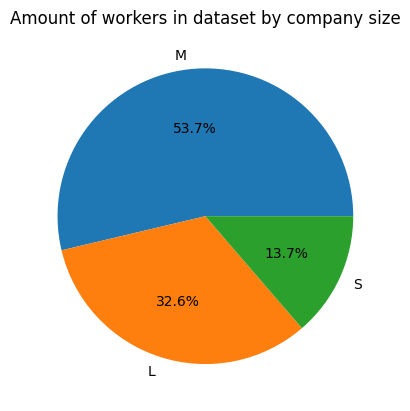

In [136]:
tmp = df['company_size']
tmp = tmp.value_counts()
tmp = tmp.to_frame()
tmp['percentage'] = tmp['company_size'] / tmp['company_size'].sum()
tmp.reset_index(inplace=True)
# create a seaborn pie chart
plt.pie(tmp['percentage'], labels=tmp['index'], autopct='%1.1f%%')
plt.title("Amount of workers in dataset by company size")
# show percentages in ledgend

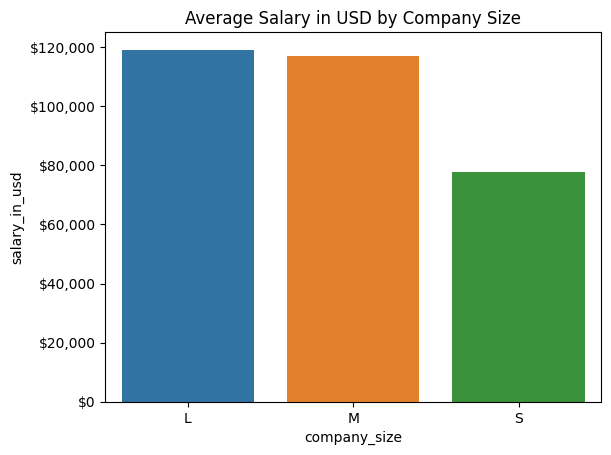

In [142]:
#average salary by company size
tmp = df[['company_size', 'salary_in_usd']]
tmp = tmp.groupby('company_size')['salary_in_usd'].mean().reset_index()
plot = sns.barplot(data = tmp, y='salary_in_usd', x='company_size')
plot.title.set_text('Average Salary in USD by Company Size')
plot.yaxis.set_major_formatter('${x:,.0f}')

The following barplot compares the salary of each job title. Data Analytic Lead seems to receive the highest salary in average while 3D Computer Vision Researcher appears to get the lowest among all the jobs in this dataset.

<AxesSubplot: xlabel='salary_in_usd', ylabel='job_title'>

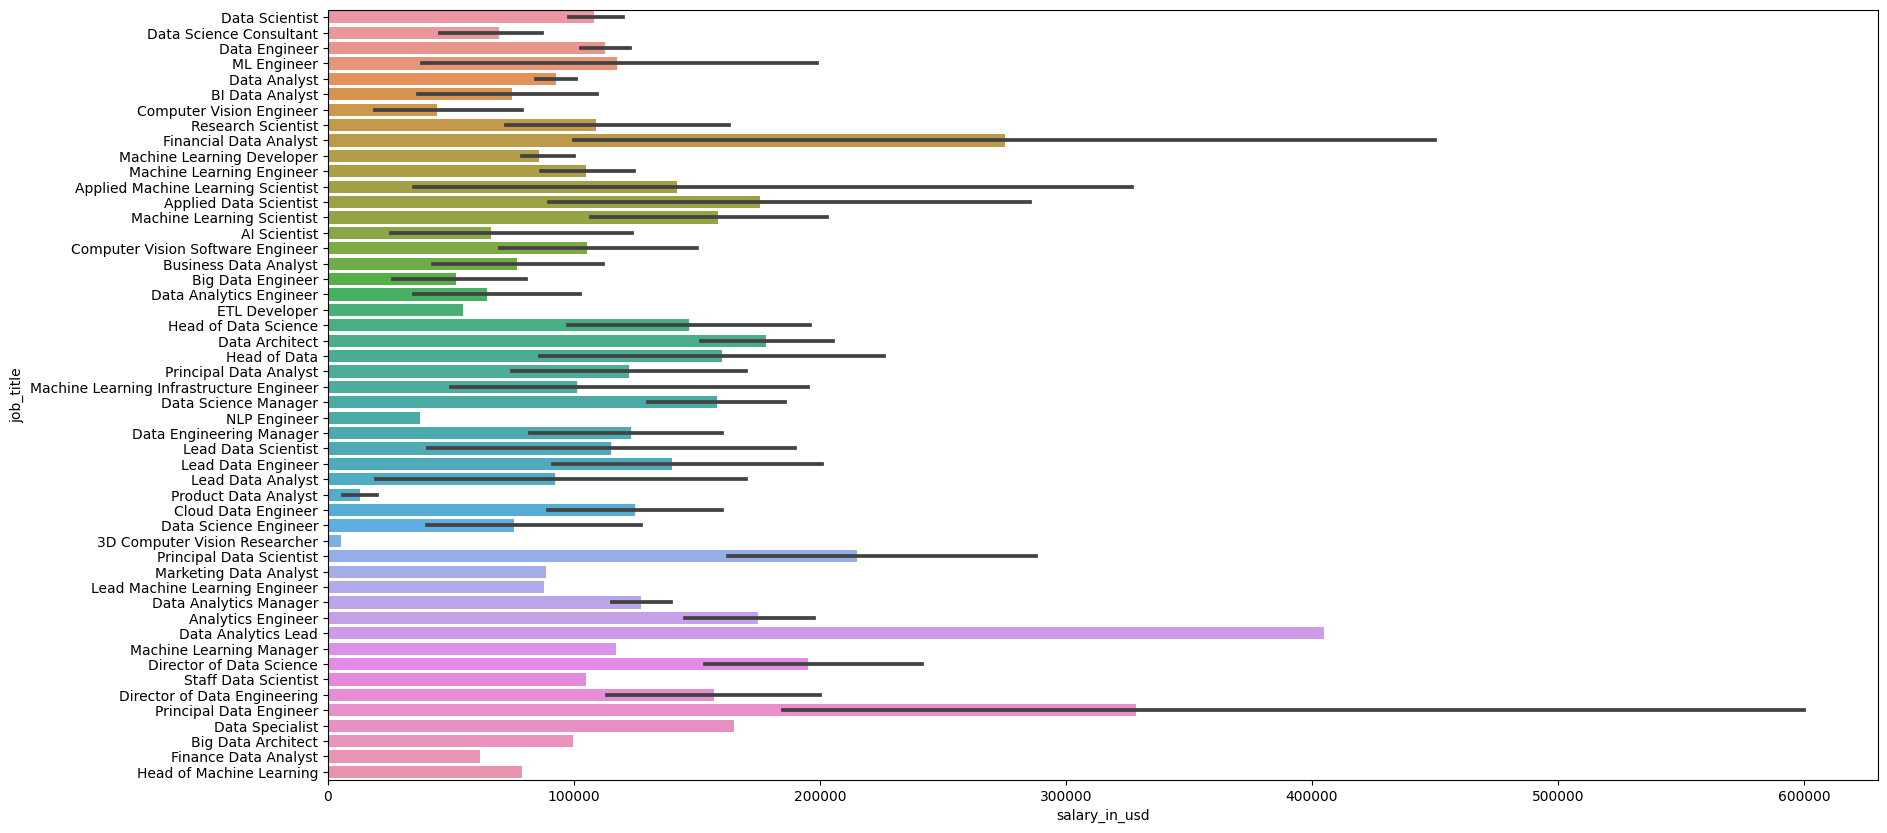

In [228]:
fig, ax = plt.subplots(figsize=(20, 10))
tmp = df[['salary_in_usd', 'job_title']]
# plt.xticks(rotation=90)
sns.barplot(data=tmp, x='salary_in_usd', y='job_title')

<AxesSubplot: xlabel='salary_in_usd', ylabel='job_title'>

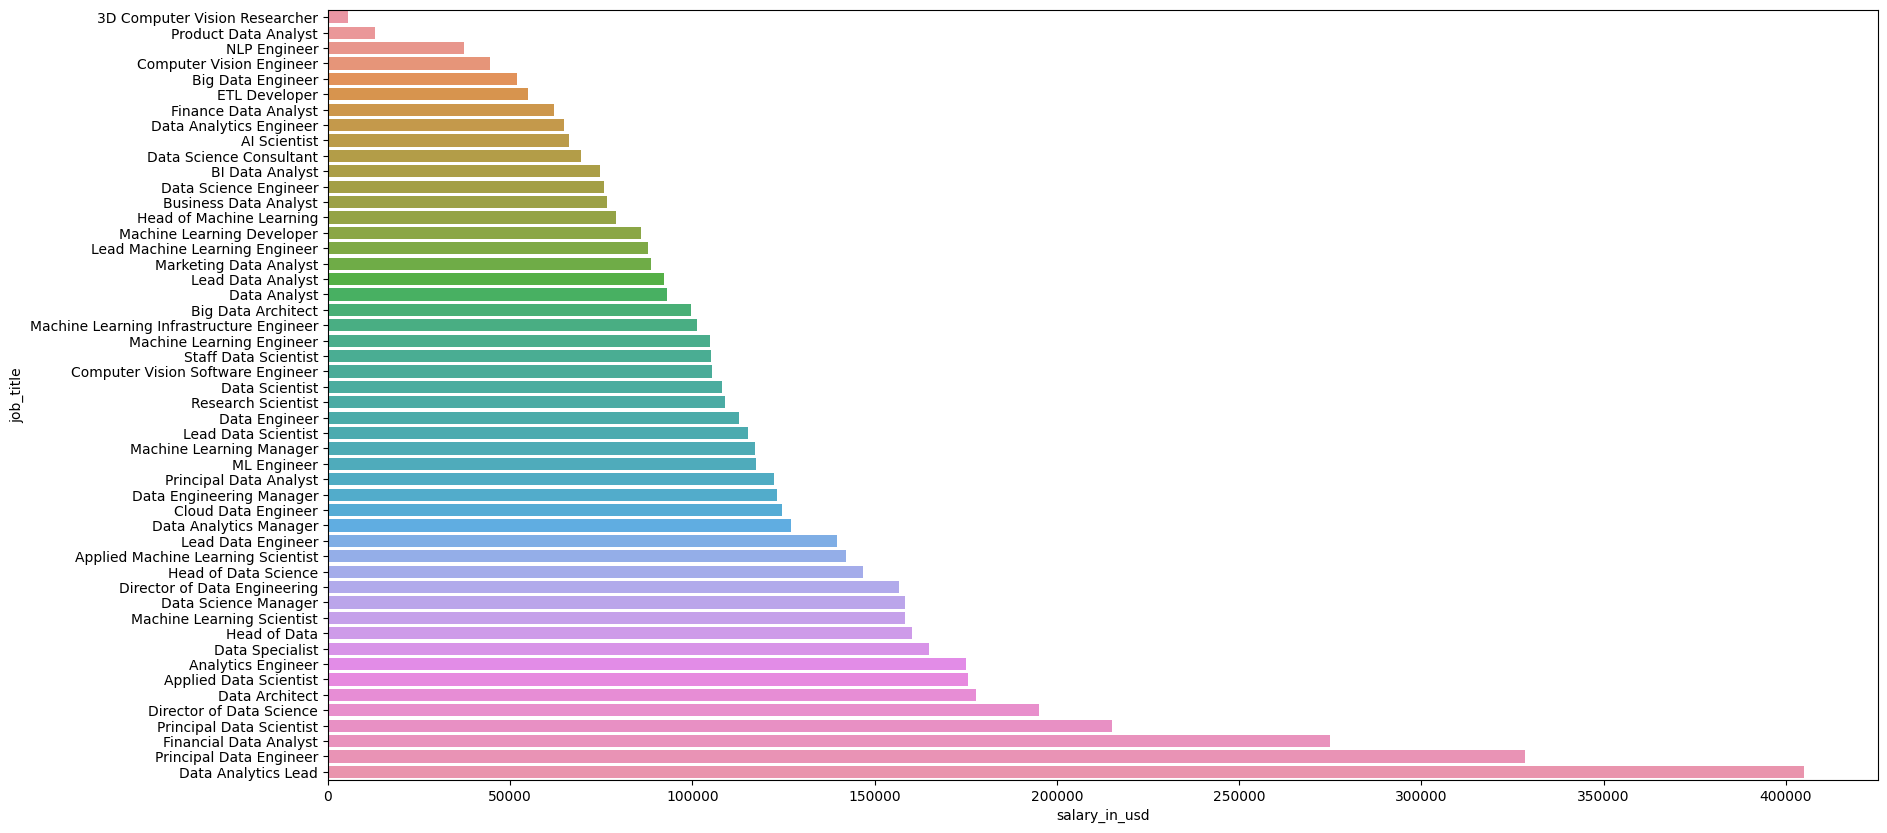

In [226]:
fig, ax = plt.subplots(figsize=(20, 10))
tmp = df[['salary_in_usd', 'job_title']]
tmp = tmp.groupby('job_title')['salary_in_usd'].mean().reset_index()
tmp = tmp.sort_values('salary_in_usd', ascending=True)
# plt.xticks(rotation=90)
sns.barplot(data=tmp, x='salary_in_usd', y='job_title')

In [ ]:
CONDENSED_TITLES = ['scientist', 'engineer', 'anaylst', 'developer', 'consultant', 'head', 'architect', 'manager', 'director', 'researcher', 'lead']

In [76]:
print(df['job_title'].unique())

['Data Scientist' 'Data Science Consultant' 'Data Engineer' 'ML Engineer'
 'Data Analyst' 'BI Data Analyst' 'Computer Vision Engineer'
 'Research Scientist' 'Financial Data Analyst'
 'Machine Learning Developer' 'Machine Learning Engineer'
 'Applied Machine Learning Scientist' 'Applied Data Scientist'
 'Machine Learning Scientist' 'AI Scientist'
 'Computer Vision Software Engineer' 'Business Data Analyst'
 'Big Data Engineer' 'Data Analytics Engineer' 'ETL Developer'
 'Head of Data Science' 'Data Architect' 'Head of Data'
 'Principal Data Analyst' 'Machine Learning Infrastructure Engineer'
 'Data Science Manager' 'NLP Engineer' 'Data Engineering Manager'
 'Lead Data Scientist' 'Lead Data Engineer' 'Lead Data Analyst'
 'Product Data Analyst' 'Cloud Data Engineer' 'Data Science Engineer'
 '3D Computer Vision Researcher' 'Principal Data Scientist'
 'Marketing Data Analyst' 'Lead Machine Learning Engineer'
 'Data Analytics Manager' 'Analytics Engineer' 'Data Analytics Lead'
 'Machine Learn

The remote job trend seems to be decrease as the time pass. People tend to find the job in their home town, rather than doing remotely.

<AxesSubplot: xlabel='work_year', ylabel='count'>

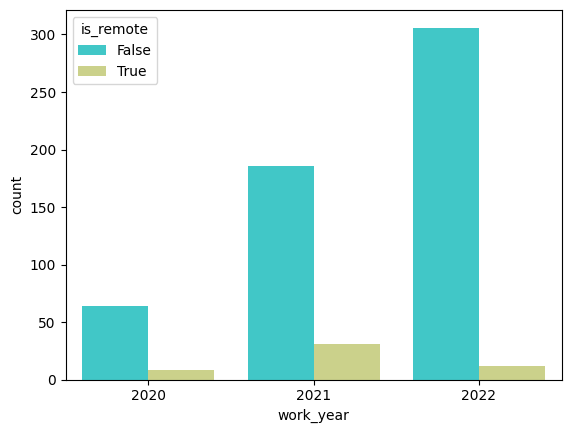

In [70]:
df['is_remote'] = df['employee_residence'] != df['company_location']
tmp = df[['work_year', 'is_remote']]
sns.countplot(data=tmp, x='work_year', hue='is_remote', palette='rainbow')

Unsurprisingly, executive-level/director receives the highest salary, followed by senior-level/expert, mid-level/intermediate, and entry-level/junior. Moreover, contract tends to pay the most in contrast to part-time that pays the least.

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

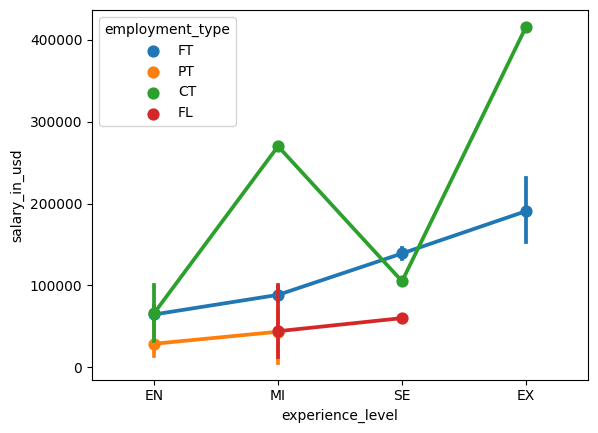

In [71]:
df['experience_level'] = pd.Categorical(df['experience_level'], categories=['EN', 'MI', 'SE', 'EX'], ordered=True)
df.sort_values('experience_level', inplace=True)
tmp = df[['salary_in_usd', 'experience_level', 'employment_type']]
sns.pointplot(data=tmp, x='experience_level', y='salary_in_usd', hue='employment_type')

Text(0.5, 1.0, 'Average Salary by Company Location')

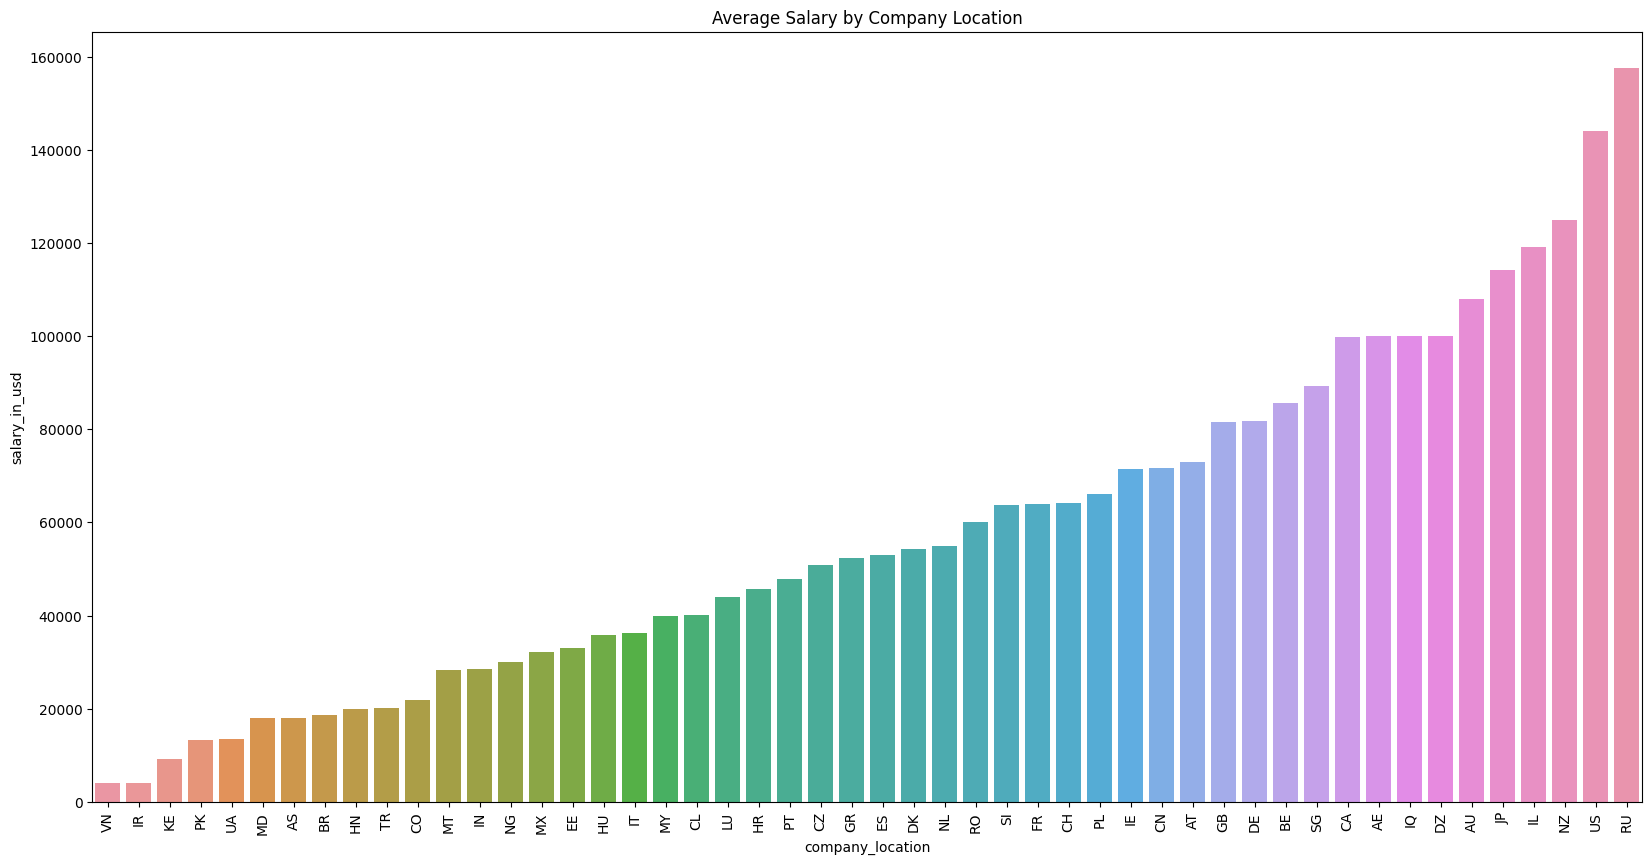

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))
tmp = df[['salary_in_usd', 'company_location']]
tmp = tmp.groupby('company_location')['salary_in_usd'].mean().reset_index()
tmp = tmp.sort_values('salary_in_usd', ascending=True)
plt.xticks(rotation=90)
sns.barplot(data=tmp, y='salary_in_usd', x='company_location')
plt.title('Average Salary by Company Location')

Text(0.5, 1.0, 'Max Salary by Company Location')

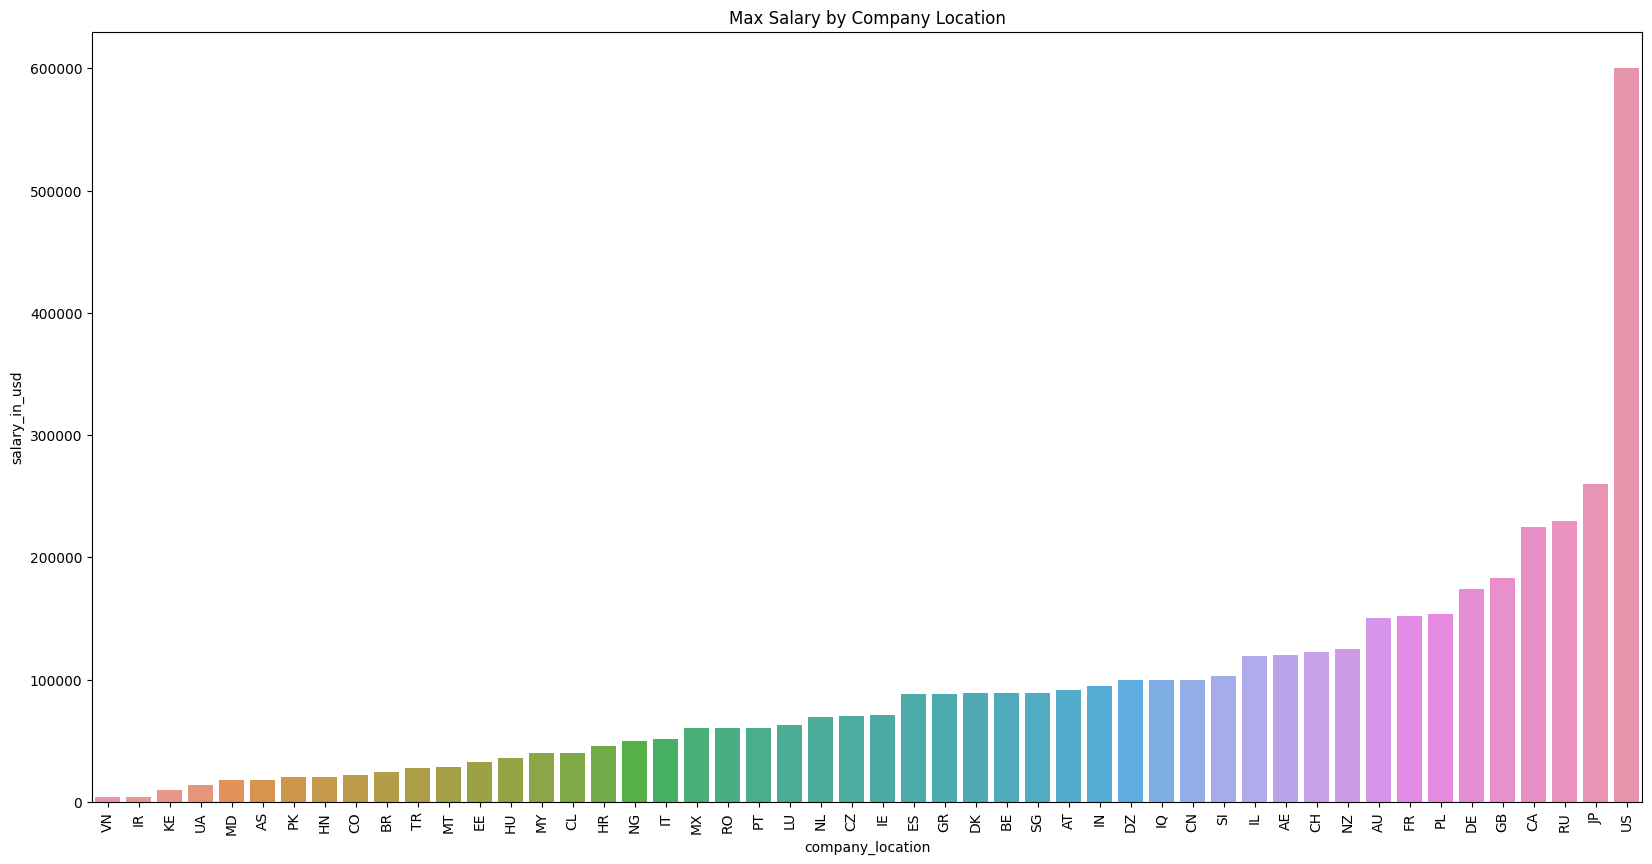

In [80]:
fig, ax = plt.subplots(figsize=(20, 10))
tmp = df[['salary_in_usd', 'company_location']]
tmp = tmp.groupby('company_location')['salary_in_usd'].max().reset_index()
tmp = tmp.sort_values('salary_in_usd', ascending=True)
plt.xticks(rotation=90)
sns.barplot(data=tmp, y='salary_in_usd', x='company_location')
plt.title('Max Salary by Company Location')

   company_location  salary_in_usd iso_a3
0                AE  100000.000000    ARE
1                AS   18053.000000    ASM
2                AT   72920.750000    AUT
3                AU  108042.666667    AUS
4                BE   85699.000000    BEL
5                BR   18602.666667    BRA
6                CA   99823.733333    CAN
7                CH   64114.000000    CHE
8                CL   40038.000000    CHL
9                CN   71665.500000    CHN
10               CO   21844.000000    COL
11               CZ   50937.000000    CZE
12               DE   81887.214286    DEU
13               DK   54386.333333    DNK
14               DZ  100000.000000    DZA
15               EE   32974.000000    EST
16               ES   53060.142857    ESP
17               FR   63970.666667    FRA
18               GB   81583.042553    GBR
19               GR   52293.090909    GRC
20               HN   20000.000000    HND
21               HR   45618.000000    HRV
22               HU   35735.000000

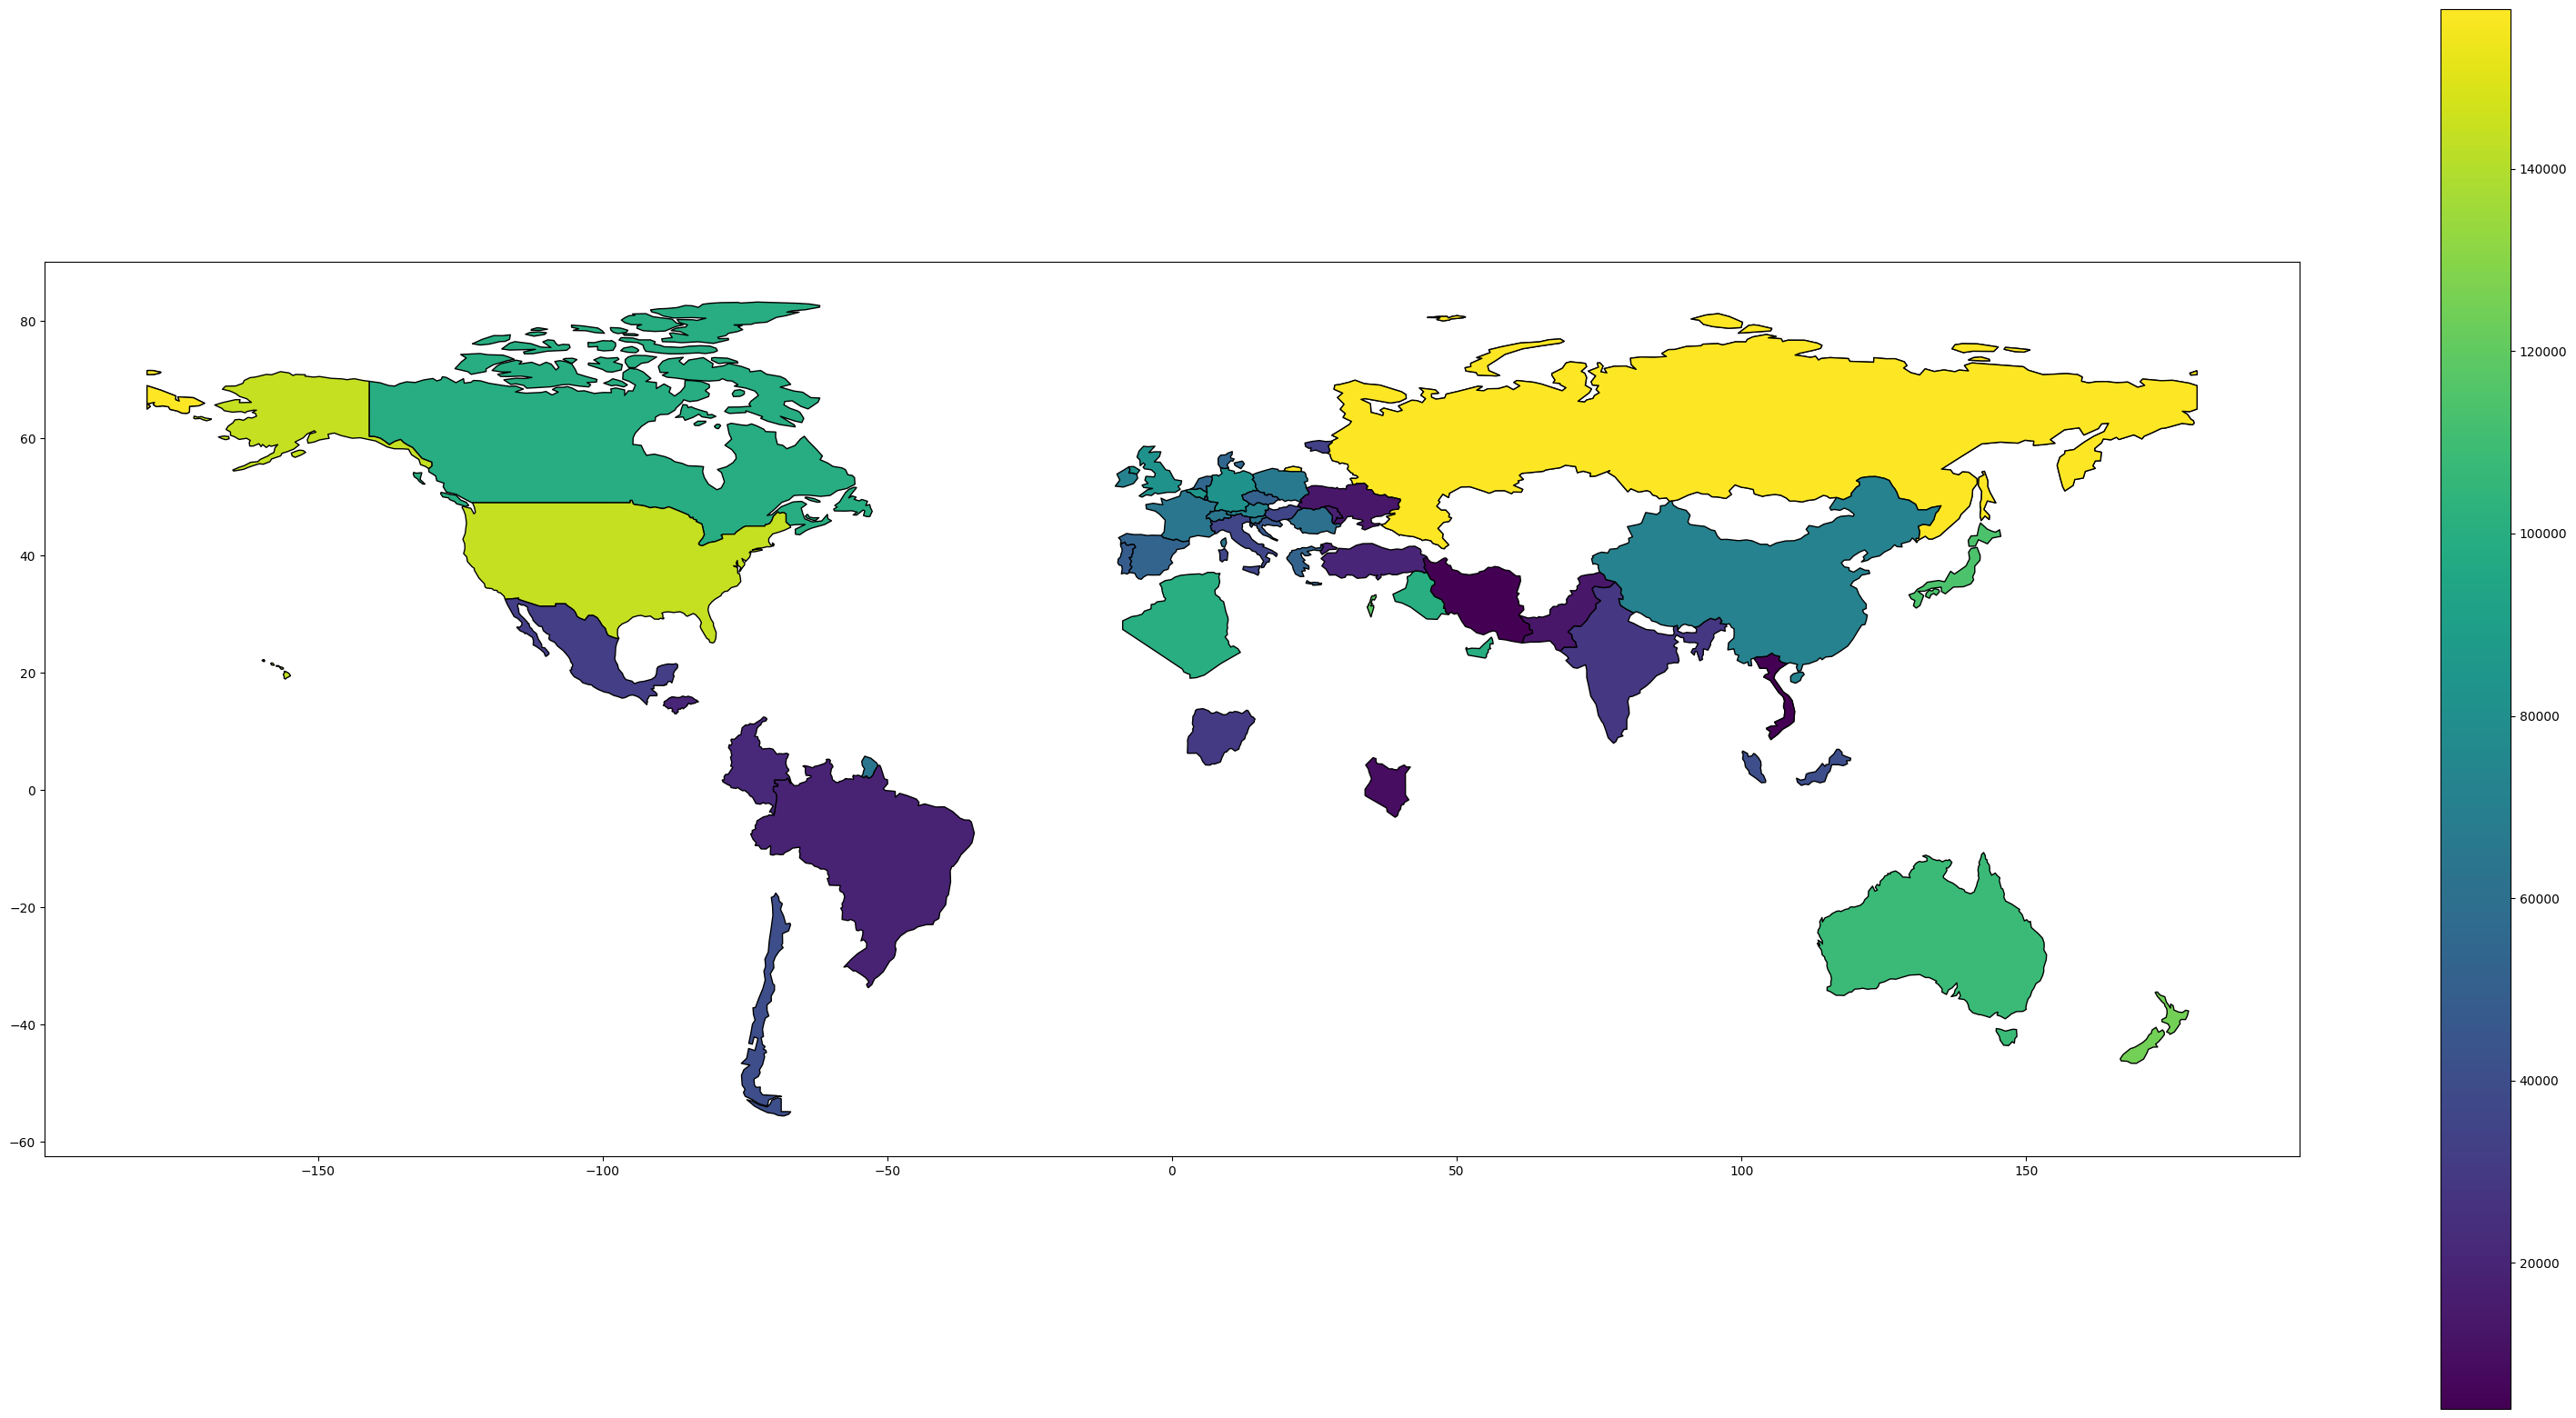

In [224]:
tmp = df[['salary_in_usd', 'company_location']]
tmp = tmp.groupby('company_location')['salary_in_usd'].mean().reset_index()

coorddf = pd.read_csv('static/country_coord.csv')
coorddf = coorddf[['Alpha-2-code', 'Alpha-3-code']]
#remove the "" from the Alpha-2-code column

#rename columns to something easier

coorddf.rename(columns={'Alpha-2-code': 'country_code', 'Alpha-3-code': 'iso_a3'}, inplace=True)

tmp['company_location'] = tmp['company_location'].astype(str)
coorddf['country_code'] = coorddf['country_code'].astype(str)



coorddf['country_code'] = coorddf['country_code'].str.replace('"', '')
coorddf['country_code'] = coorddf['country_code'].str.replace(' ', '')

coorddf['iso_a3'] = coorddf['iso_a3'].str.replace('"', '')
coorddf['iso_a3'] = coorddf['iso_a3'].str.replace(' ', '')


# map the 2-alpha country codes from coorddf to the company_location column in tmp
merged = pd.merge(tmp, coorddf, left_on='company_location', right_on='country_code', how='inner')
merged.drop(columns=['country_code'], inplace=True)

print(merged)



# create a map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(merged, on='iso_a3')
plot = merged.plot(column='salary_in_usd', cmap='viridis', figsize=(40, 20), legend=True, edgecolor='black', linewidth=1)

# Plot the locations with unknown country as separate markers
plt.show()


# world = gpd.GeoDataFrame(merged, geometry=gpd.points_from_xy(merged.long, merged.lat))
# world.plot(column='salary_in_usd', cmap='OrRd', figsize=(20, 10), legend=True)
# plt.title('Average Salary by Country')
# plt.show()